<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [3]:
#import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [4]:
#Read input dataset
col_names = ['sepal length','sepal width','petal length','petal width', 'class']
df = pd.read_csv("iris.data")
df.columns = col_names
df

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Describe dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#get info about dataset
print("The Shape of the dataset : \n",df.shape,'\n')
df.info()

The Shape of the dataset : 
 (149, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<AxesSubplot:>

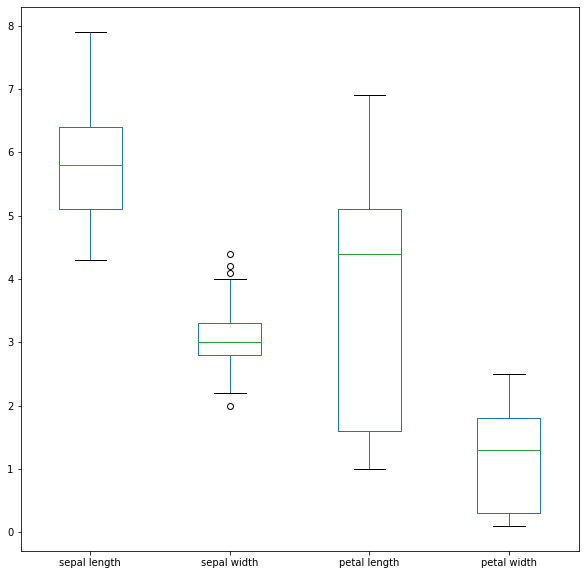

In [7]:
# Check for outliers
df.plot.box(figsize=(10,10))

In [8]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print("Old Shape: ", df.shape) 
# Upper bound
upper = np.where(df >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df <= (Q1-1.5*IQR))
#dropping outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (149, 5)
New Shape:  (145, 5)


<ipython-input-8-7aad49eaec8c>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper = np.where(df >= (Q3+1.5*IQR))
<ipython-input-8-7aad49eaec8c>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower = np.where(df <= (Q1-1.5*IQR))


<AxesSubplot:>

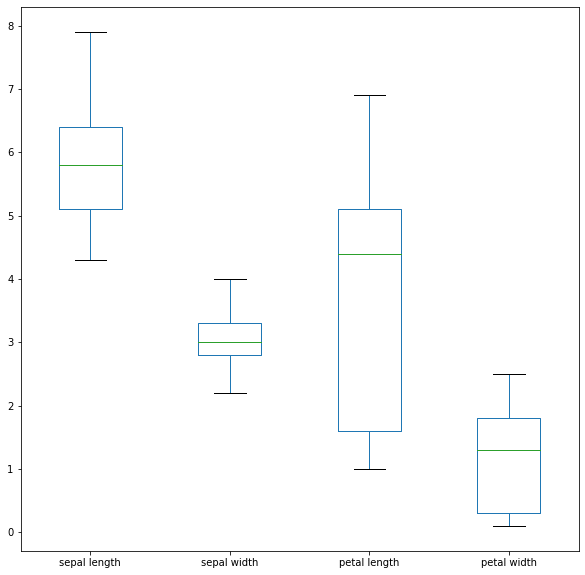

In [9]:
# Check if outliers were removed
df.plot.box(figsize=(10,10))

In [10]:
#check for missing data
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [11]:
# check for duplicates
print(df.duplicated().sum())

3


In [12]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
#check if duplicates were removed
print(df.duplicated().sum())

0


In [14]:
#find number of unique classes
len(df['class'].unique())

3

In [15]:
#Check if dataset is balanced
df.groupby('class').size()

class
Iris-setosa        44
Iris-versicolor    49
Iris-virginica     49
dtype: int64

## Visualization visual inspection of dataset

<AxesSubplot:>

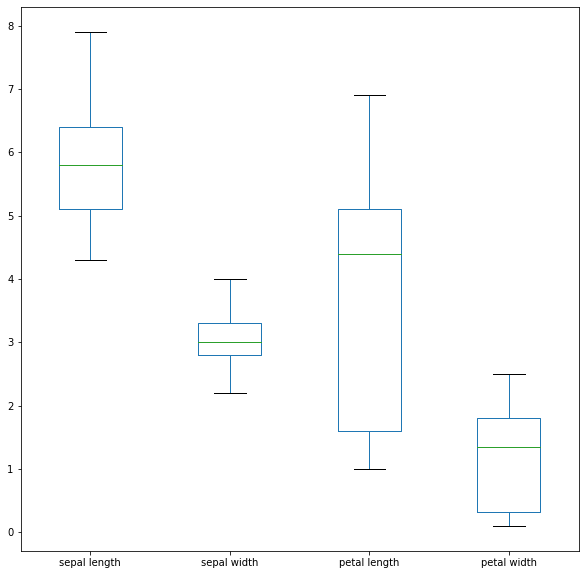

In [16]:
#Box Plot for each input variable
df.plot.box(figsize=(10,10))

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

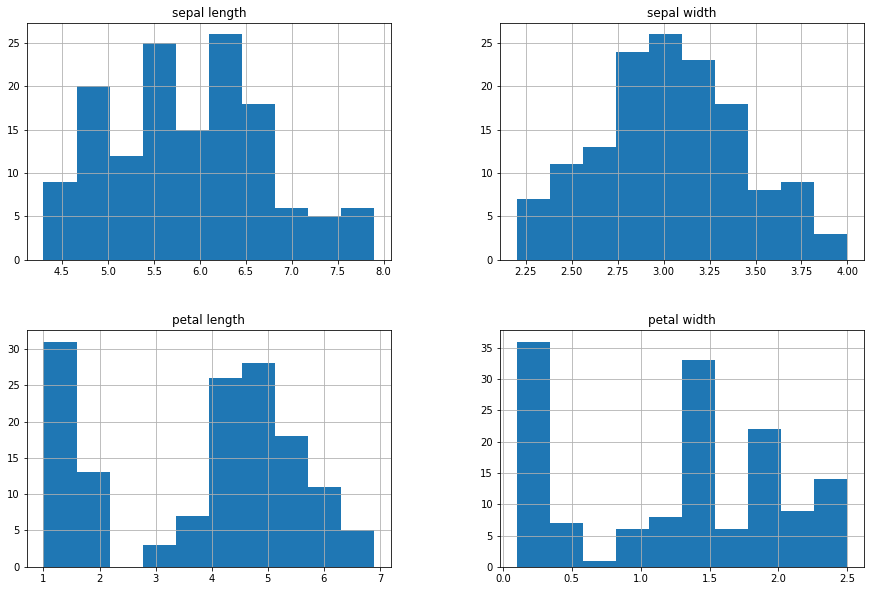

In [17]:
#Histogram Plot for each input variable
df.hist(figsize=(15,10))

<AxesSubplot:ylabel='Frequency'>

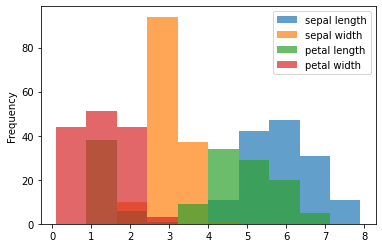

In [18]:
df.plot.hist(alpha=0.7)

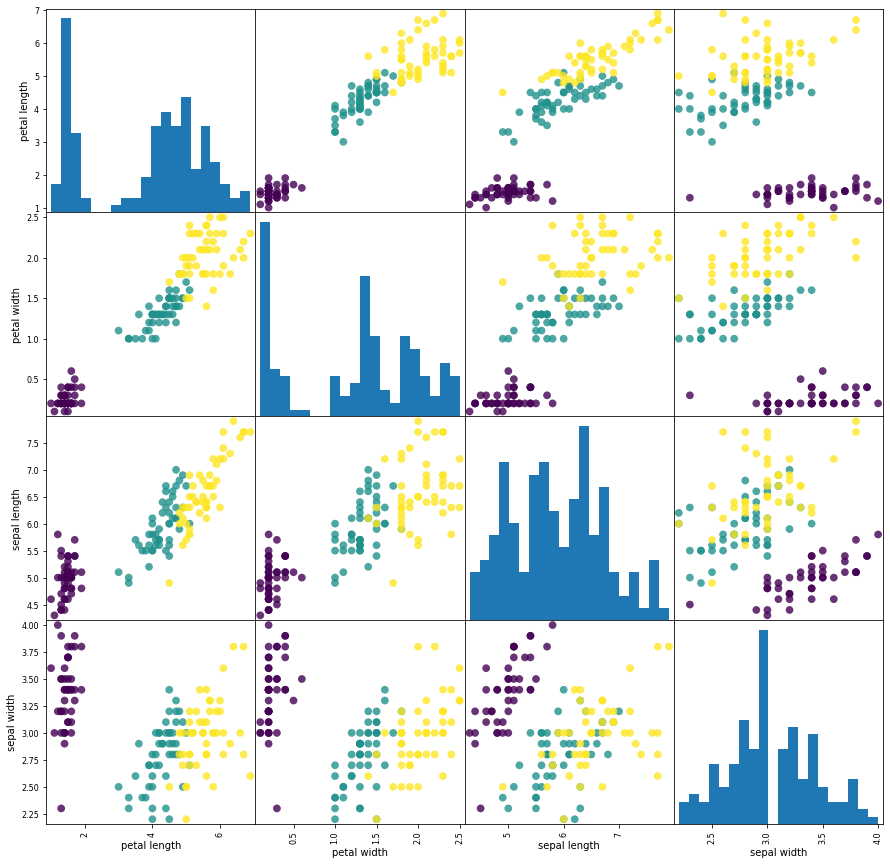

In [19]:
#scatter Plot for two input variables
y=pd.factorize(df['class'])[0]
x=df[df.columns.difference(['class'])]
pd.plotting.scatter_matrix(x,figsize =(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,c=y)
plt.show()

In [20]:
#Statistical Summary after cleaning
df.describe()

,sepal length,sepal width,petal length,petal width
count,142.000000,142.000000,142.000000,142.000000
mean,5.876056,3.035211,3.847887,1.238028
std,0.835466,0.397724,1.744971,0.752182
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.400000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [21]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test )

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.89


In [23]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.94


In [24]:
#K nearest nighbor
from sklearn.neighbors import KNeighborsClassifier
kList=[]
accList=[]
for k in range(1,15):
    kList.append(k)
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    print('Accuracy of K-NN classifier on training set for k = {}: {:.2f}'
     .format(k,knn.score(x_train, y_train)))
    acc=knn.score(x_test, y_test)
    print('Accuracy of K-NN classifier on test set for k = {} : {:.2f}'
     .format(k,acc))
    accList.append(acc)

Accuracy of K-NN classifier on training set for k = 1: 1.00
Accuracy of K-NN classifier on test set for k = 1 : 0.92
Accuracy of K-NN classifier on training set for k = 2: 0.97
Accuracy of K-NN classifier on test set for k = 2 : 0.92
Accuracy of K-NN classifier on training set for k = 3: 0.97
Accuracy of K-NN classifier on test set for k = 3 : 0.94
Accuracy of K-NN classifier on training set for k = 4: 0.97
Accuracy of K-NN classifier on test set for k = 4 : 0.92
Accuracy of K-NN classifier on training set for k = 5: 0.96
Accuracy of K-NN classifier on test set for k = 5 : 0.92
Accuracy of K-NN classifier on training set for k = 6: 0.97
Accuracy of K-NN classifier on test set for k = 6 : 0.92
Accuracy of K-NN classifier on training set for k = 7: 0.98
Accuracy of K-NN classifier on test set for k = 7 : 0.92
Accuracy of K-NN classifier on training set for k = 8: 0.98
Accuracy of K-NN classifier on test set for k = 8 : 0.92
Accuracy of K-NN classifier on training set for k = 9: 0.97
Accu

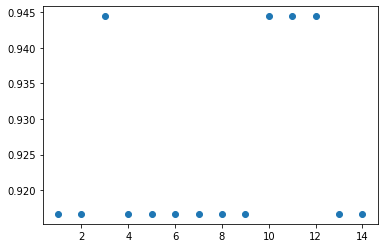

In [25]:
plt.plot(kList,accList,'o')

In [26]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.92


In [27]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.94


In [28]:
T=[0.2,0.3,0.4,0.5,0.6]
accList=[]
sList=[]
for t in T:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =t, random_state=0)
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    print('Accuracy of K-NN classifier on training set for test size = {} : {:.2f}'
     .format(t,knn.score(x_train, y_train)))
    acc=knn.score(x_test, y_test)
    print('Accuracy of K-NN classifier on test set for test size = {} : {:.2f}'
     .format(t,acc))
    accList.append(acc)
    sList.append(t)

Accuracy of K-NN classifier on training set for test size = 0.2 : 0.96
Accuracy of K-NN classifier on test set for test size = 0.2 : 0.93
Accuracy of K-NN classifier on training set for test size = 0.3 : 0.96
Accuracy of K-NN classifier on test set for test size = 0.3 : 0.91
Accuracy of K-NN classifier on training set for test size = 0.4 : 0.96
Accuracy of K-NN classifier on test set for test size = 0.4 : 0.91
Accuracy of K-NN classifier on training set for test size = 0.5 : 0.94
Accuracy of K-NN classifier on test set for test size = 0.5 : 0.93
Accuracy of K-NN classifier on training set for test size = 0.6 : 0.96
Accuracy of K-NN classifier on test set for test size = 0.6 : 0.91


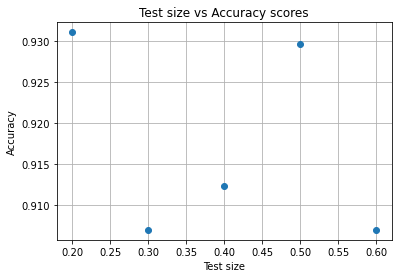

In [29]:
plt.xlabel("Test size")
plt.ylabel("Accuracy")
plt.title("Test size vs Accuracy scores")
plt.grid()
plt.plot(sList,accList,'o')

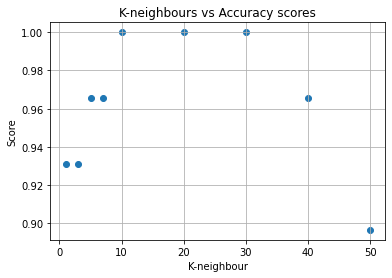

In [30]:
Ks = [1, 3, 5, 7, 10, 20, 30, 40, 50]
scores = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
for i in Ks:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

plt.scatter(Ks, scores)
plt.xlabel("K-neighbour")
plt.ylabel("Score")
plt.title("K-neighbours vs Accuracy scores")
plt.grid()
plt.show()


## Changing parameters in different ML models

In [31]:
#Logistic Regression
logreg = LogisticRegression(penalty='none')
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

0.9655172413793104

In [32]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
clf.score(x_test, y_test)

0.9310344827586207

In [33]:
#SVC
svm = SVC(C=0.9)
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

1.0